# ANOVA - Analysis of Variance
We will continue our discussion on linear models. Today, we will be learning ANOVA, a generalized form of comparing mean across multiple groups. 
Agenda today:
- Compare t-tests and ANOVA
- Learn to calculate ANOVA & details 
- Implement ANOVA in python


## Part I. T Test or ANOVA?
Suppose we want to compare whether multiple groups differ in some type of measures. For example, we have collected mood data grouped by four types of weather - sunny, raining, overcast, or snowy, and we want to find out whether there is a difference in mood across different weather. What tests would you use?

A natural reaction would be to conduct multiple t-tests. However, that comes with many drawbacks. First, you would need $\frac{n(n-1)}{2}$ t tests, which come out to 6 tests. Having more tests meaning having higher chance of making type I error. In this case, our original probability of making type I error grew from 5% to 5% x 6 = 30%! By conduct 6 tests and comparing their mean to each other, we are running a huge risk of making false positives. How then, can we combat this? -- ANOVA!

Instead of looking at each individual difference, ANOVA examines the ratio of variance between groups, and variance within groups, and find out whether the ratio is big enough to be statistically significant. 

#### T Test statistics 
## $$t = \frac{x\bar - \mu}{\frac{s}{\sqrt n}}$$

#### ANOVA - the F test
## $$F = \frac{MS_bet}{MS_within}$$

#We can also say that t test is a special case of ANOVA in that we are comparing the means of only two groups.

Degrees of Freedom for ANOVA:
- DFbetween = k - 1
- DFwithin = N - k
- DFtotal = N - 1

## Part II. Calculating ANOVA 
In this section, we will learn how to calculate ANOVA without using any pacakges. All we need to calculate is:

- $SS_b$ = $n\sum(\bar X - \bar X_i)^2 $

- $SS_w$ = $\sum (n_i - 1) s_i ^ 2$

- $SS_t$ = $\sum (X_ij - \bar X)^2$

- $MS_b$ = $\frac{SS_b}{DF_b}$

- $MS_w$ = $\frac{SS_w}{DF_w}$

- $F$ = $\frac{MS_b}{MS_w}$

In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
data  = pd.read_csv('ToothGrowth.csv')


In [4]:
type(data)

pandas.core.frame.DataFrame

In [3]:
data.head()

,Unnamed: 0,len,supp,dose
0,1,4.2,VC,0.5
1,2,11.5,VC,0.5
2,3,7.3,VC,0.5
3,4,5.8,VC,0.5
4,5,6.4,VC,0.5


In [5]:
data = data.iloc[:,1:]
data.head()

,len,supp,dose
0,4.2,VC,0.5
1,11.5,VC,0.5
2,7.3,VC,0.5
3,5.8,VC,0.5
4,6.4,VC,0.5


In [6]:
data.groupby(['supp']).count()

,len,dose
supp,,
OJ,30,30
VC,30,30


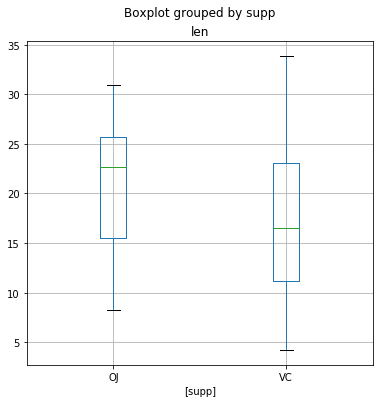

In [8]:
# boxplot is suitable to graph a categorical data

data.boxplot('len', by=['supp'],figsize=(6,6))
plt.show()

In [27]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [33]:
anova_len = ols('len ~ supp*dose',data = data).fit()
anova_len.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    len   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     50.36
Date:                Tue, 10 Sep 2019   Prob (F-statistic):           6.52e-16
Time:                        11:12:28   Log-Likelihood:                -167.48
No. Observations:                  60   AIC:                             343.0
Df Residuals:                      56   BIC:                             351.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          11.5500      1.581      7.304      0.000       8.382      14.718
supp[T.VC]         -8.2550      2.236     -3.691      0.001     -12.735      -3.775
dose                7.8114      1.195      6.534      0.000       5.417      10.206
supp[T.VC]:dose     3.9043      1.691      2.309      0.025       0.518       7.291
==============================================================================
Omnibus:                        1.508   Durbin-Watson:                   1.688
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.169
Skew:                           0.097   Prob(JB):                        0.558
Kurtosis:                       2.344   Cond. No.                         10.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
anova_table = sm.stats.anova_lm(anova_len, type=2)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
supp,1.0,205.350000,205.350000,12.317020,8.936452e-04
dose,1.0,2224.304298,2224.304298,133.415146,1.907985e-16
supp:dose,1.0,88.920107,88.920107,5.333483,2.463136e-02
Residual,56.0,933.634929,16.672052,NaN,NaN


In [39]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [48]:
mc = MultiComparison(data['len'], data['dose'])
results = mc.tukeyhsd()
print(results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
   0.5    1.0     9.13 0.001  5.9018 12.3582   True
   0.5    2.0   15.495 0.001 12.2668 18.7232   True
   1.0    2.0    6.365 0.001  3.1368  9.5932   True
---------------------------------------------------
